Hackathon1. FUN!!!! INTERESTING!!!! ENJOY!!!!!!

In [1]:
import numpy as np
import pandas as pd

In [2]:
testdata = pd.read_csv("liquid_samples_test.csv")
traindata = pd.read_csv("liquid_samples_training.csv")

In [3]:
traindata.groupby("class").agg("mean")

,sample_id,density,viscosity,conductance,pH,nitrates,phosphates,chlorides,sulphates,organics,metals,isotope_diversity
class,,,,,,,,,,,,
Class A,3024.234223,0.995868,7.327715,0.656681,6.942877,0.390012,0.305029,0.064481,0.525674,5.800449,3.180143,9.855390
Class B,3340.783685,0.994590,7.187728,0.632401,6.968609,0.313119,0.323112,0.053874,0.533926,5.564129,3.258417,10.560568
Class C,3399.992823,0.993171,7.129146,0.638141,7.091219,0.288512,0.338791,0.045626,0.553337,4.769649,3.273687,11.358614
Class X1,3896.070423,0.992441,6.826950,0.658506,7.075954,0.285294,0.328094,0.041550,0.511277,5.397450,3.406614,11.698534
Class X2,3689.500000,0.990075,7.000000,0.708704,7.724555,0.305000,0.370000,0.023667,0.483333,8.924786,3.487732,12.625000
Class Z1,2928.692308,0.995617,7.734615,0.718318,7.229395,0.531154,0.260769,0.065600,0.490400,3.431612,2.953070,10.384260
Class Z2,3286.679012,0.994773,7.204430,0.628913,7.051583,0.446019,0.267286,0.055442,0.502215,3.983212,2.664909,10.295802


In [4]:
traindata["class"].value_counts()

Class B     2182
Class A     1648
Class C      836
Class Z2     162
Class X1     142
Class Z1      26
Class X2       4
Name: class, dtype: int64

In [5]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
sample_id            5000 non-null int64
class                5000 non-null object
density              4801 non-null float64
viscosity            4878 non-null float64
conductance          5000 non-null float64
spectrum             5000 non-null object
pH                   5000 non-null float64
nitrates             4866 non-null float64
phosphates           5000 non-null float64
chlorides            4850 non-null float64
sulphates            4871 non-null float64
organics             5000 non-null float64
metals               4861 non-null float64
isotope_diversity    5000 non-null float64
dtypes: float64(11), int64(1), object(2)
memory usage: 547.0+ KB


In [6]:
traindata.isnull().sum().sort_values(ascending=False)

density              199
chlorides            150
metals               139
nitrates             134
sulphates            129
viscosity            122
isotope_diversity      0
organics               0
phosphates             0
pH                     0
spectrum               0
conductance            0
class                  0
sample_id              0
dtype: int64

In [7]:
testdata.isnull().sum().sort_values(ascending=False)

density              69
sulphates            48
viscosity            39
nitrates             36
metals               35
chlorides            29
isotope_diversity     0
organics              0
phosphates            0
pH                    0
spectrum              0
conductance           0
sample_id             0
dtype: int64

In [8]:
data=pd.concat([traindata,testdata])

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [9]:
data.shape

(6497, 14)

In [10]:
data["class"].value_counts()

Class B     2182
Class A     1648
Class C      836
Class Z2     162
Class X1     142
Class Z1      26
Class X2       4
Name: class, dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 1496
Data columns (total 14 columns):
chlorides            6318 non-null float64
class                5000 non-null object
conductance          6497 non-null float64
density              6229 non-null float64
isotope_diversity    6497 non-null float64
metals               6323 non-null float64
nitrates             6327 non-null float64
organics             6497 non-null float64
pH                   6497 non-null float64
phosphates           6497 non-null float64
sample_id            6497 non-null int64
spectrum             6497 non-null object
sulphates            6320 non-null float64
viscosity            6336 non-null float64
dtypes: float64(11), int64(1), object(2)
memory usage: 761.4+ KB


In [12]:
data.isnull().sum().sort_values(ascending=False)

class                1497
density               268
chlorides             179
sulphates             177
metals                174
nitrates              170
viscosity             161
spectrum                0
sample_id               0
phosphates              0
pH                      0
organics                0
isotope_diversity       0
conductance             0
dtype: int64

PLAN 2: drop all null
PLAN 1 : fill with average values probabily after checking varience

I am droping na

In [15]:
trainnull=traindata.dropna()

In [16]:
trainnull["class"].value_counts()

Class B     1824
Class A     1381
Class C      702
Class Z2     129
Class X1     122
Class Z1      24
Class X2       2
Name: class, dtype: int64

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
!pip install seaborn

     |████████████████████████████████| 283 kB 4.8 MB/s eta 0:00:01


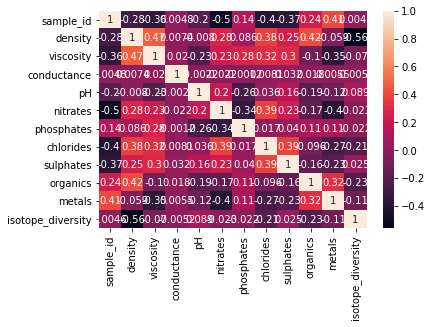

In [21]:
plt.figure()        # Size of the figure
sns.heatmap(trainnull.corr(),annot = True)
plt.show()

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

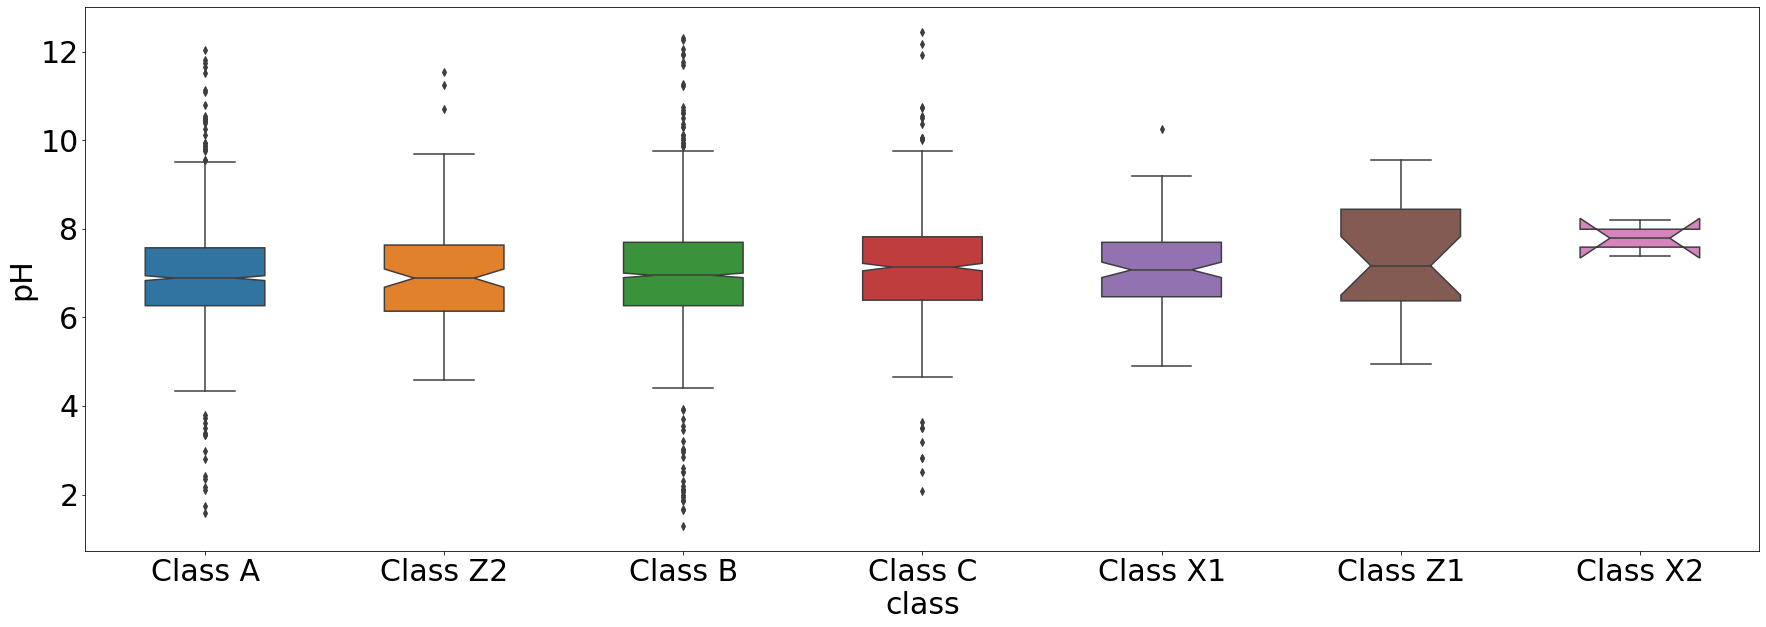

In [30]:
plt.figure(figsize = (30,10))
sns.boxplot( x=trainnull["class"], y=trainnull["pH"], width = 0.5, notch = True)
plt.rcParams.update({'font.size': 30})

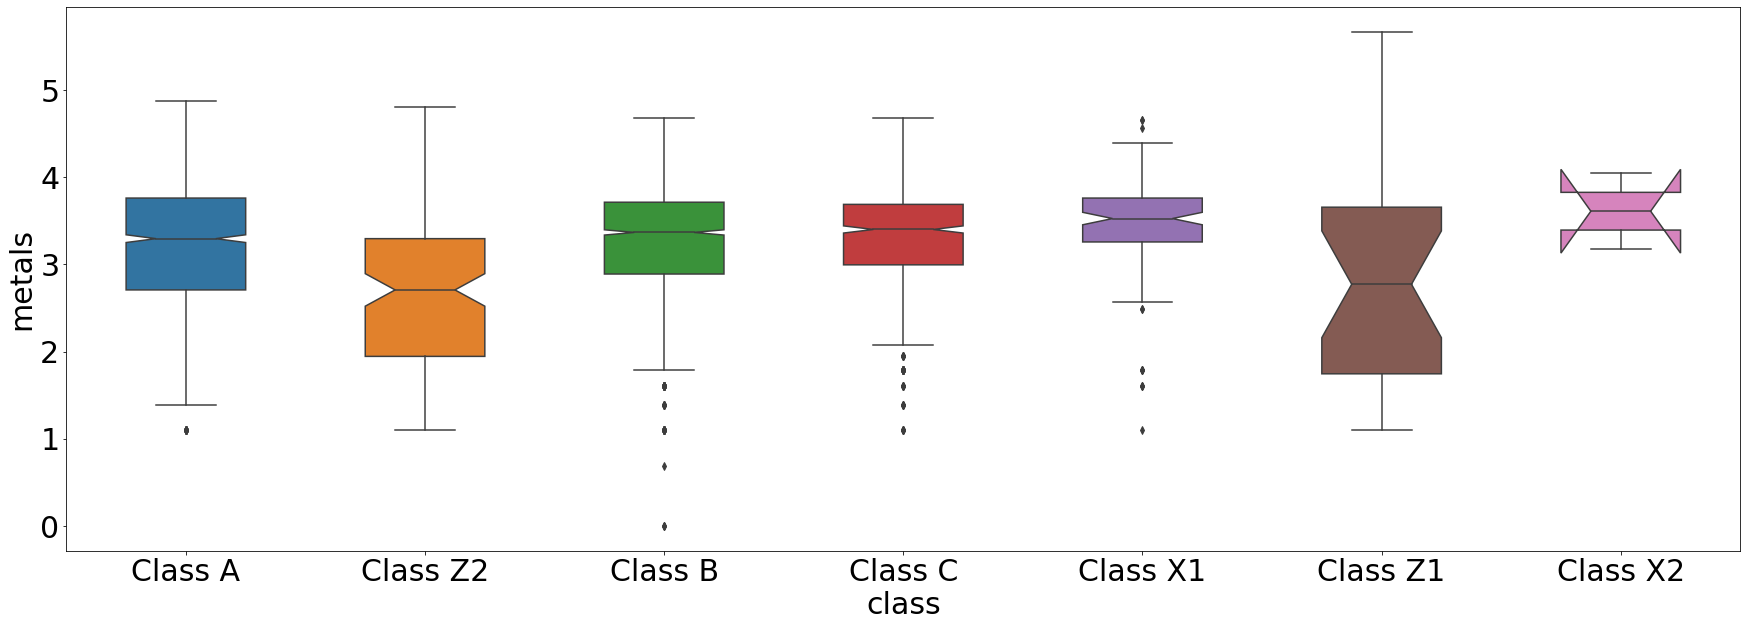

In [31]:
plt.figure(figsize = (30,10))
sns.boxplot( x=trainnull["class"], y=trainnull["metals"], width = 0.5, notch = True)
plt.rcParams.update({'font.size': 30})

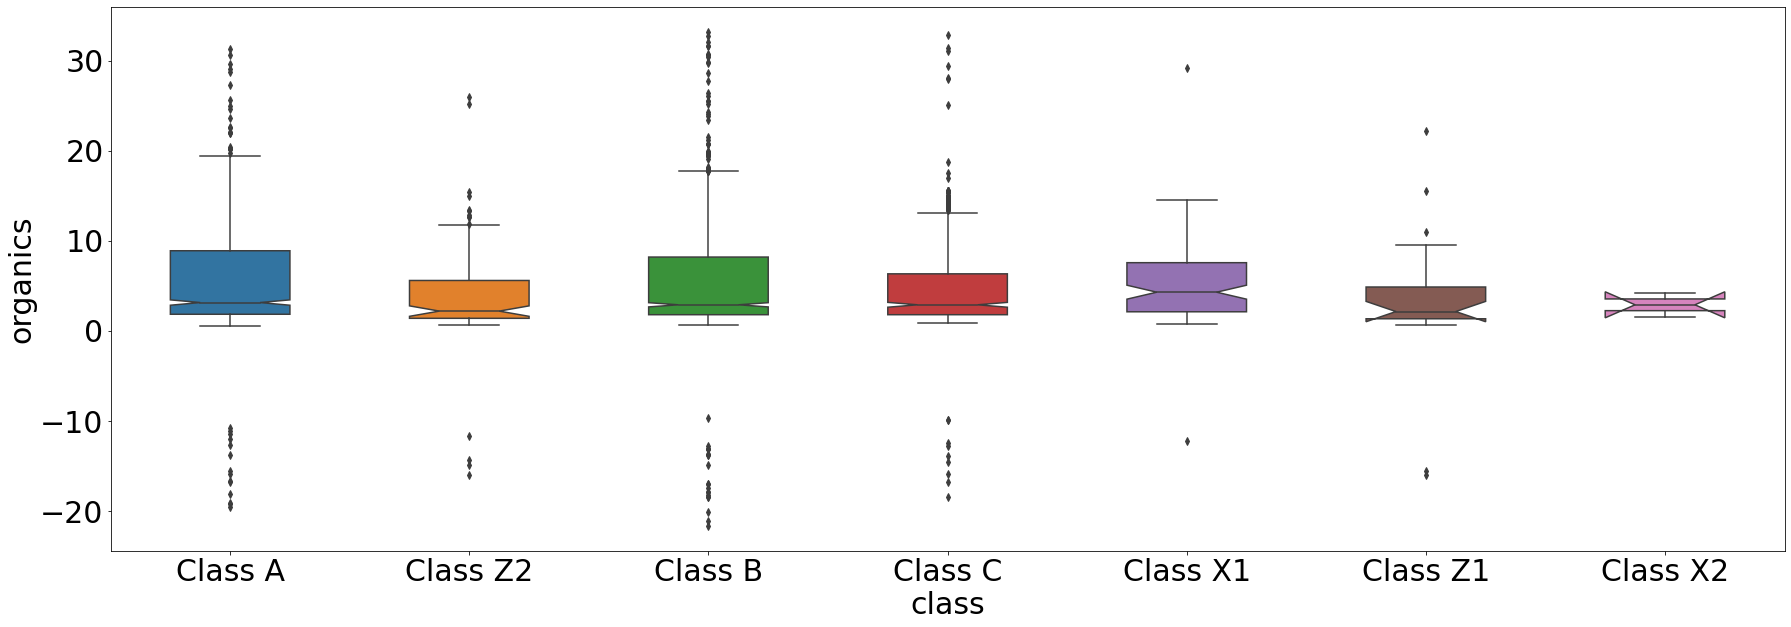

In [32]:
plt.figure(figsize = (30,10))
sns.boxplot( x=trainnull["class"], y=trainnull["organics"], width = 0.5, notch = True)
plt.rcParams.update({'font.size': 30})

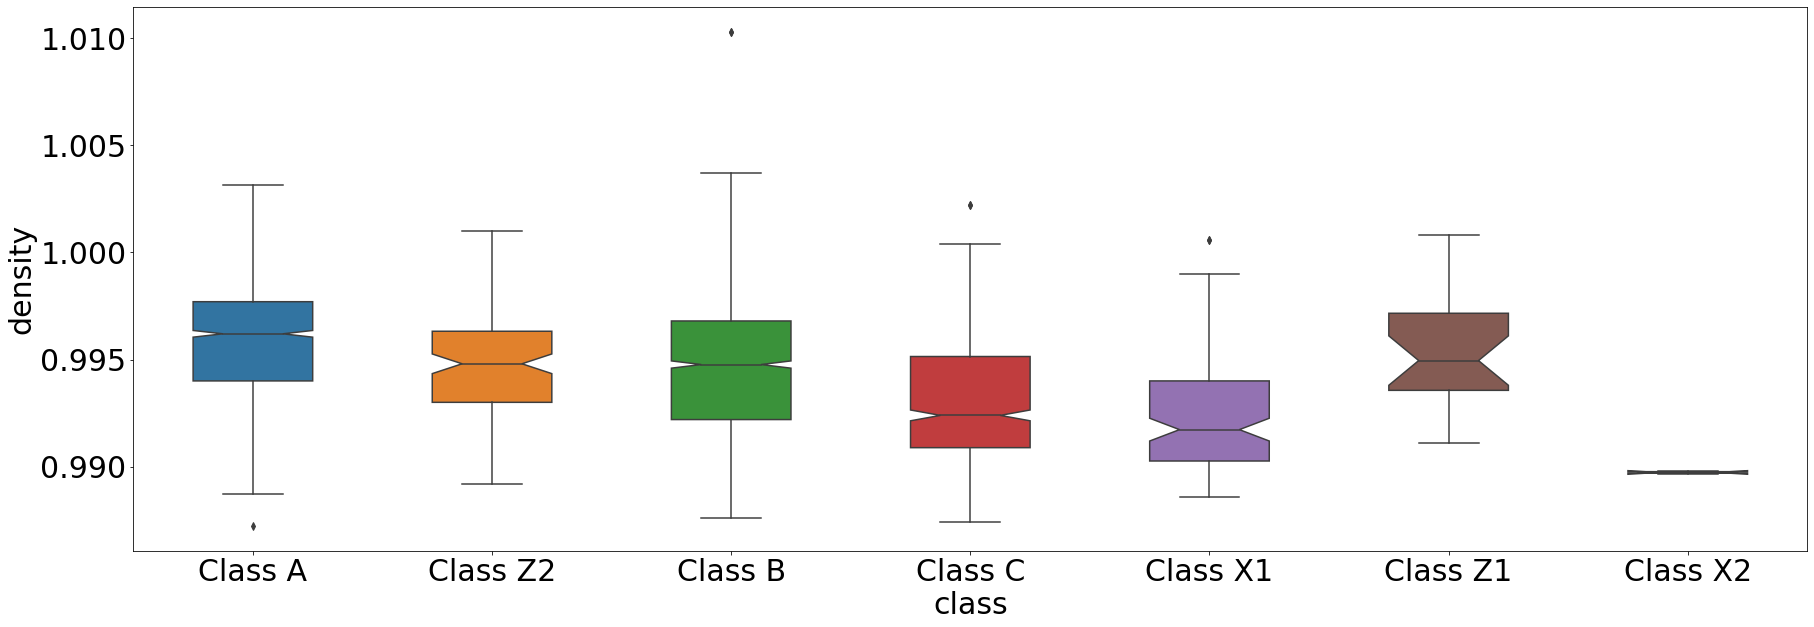

In [33]:
plt.figure(figsize = (30,10))
sns.boxplot( x=trainnull["class"], y=trainnull["density"], width = 0.5, notch = True)
plt.rcParams.update({'font.size': 30})

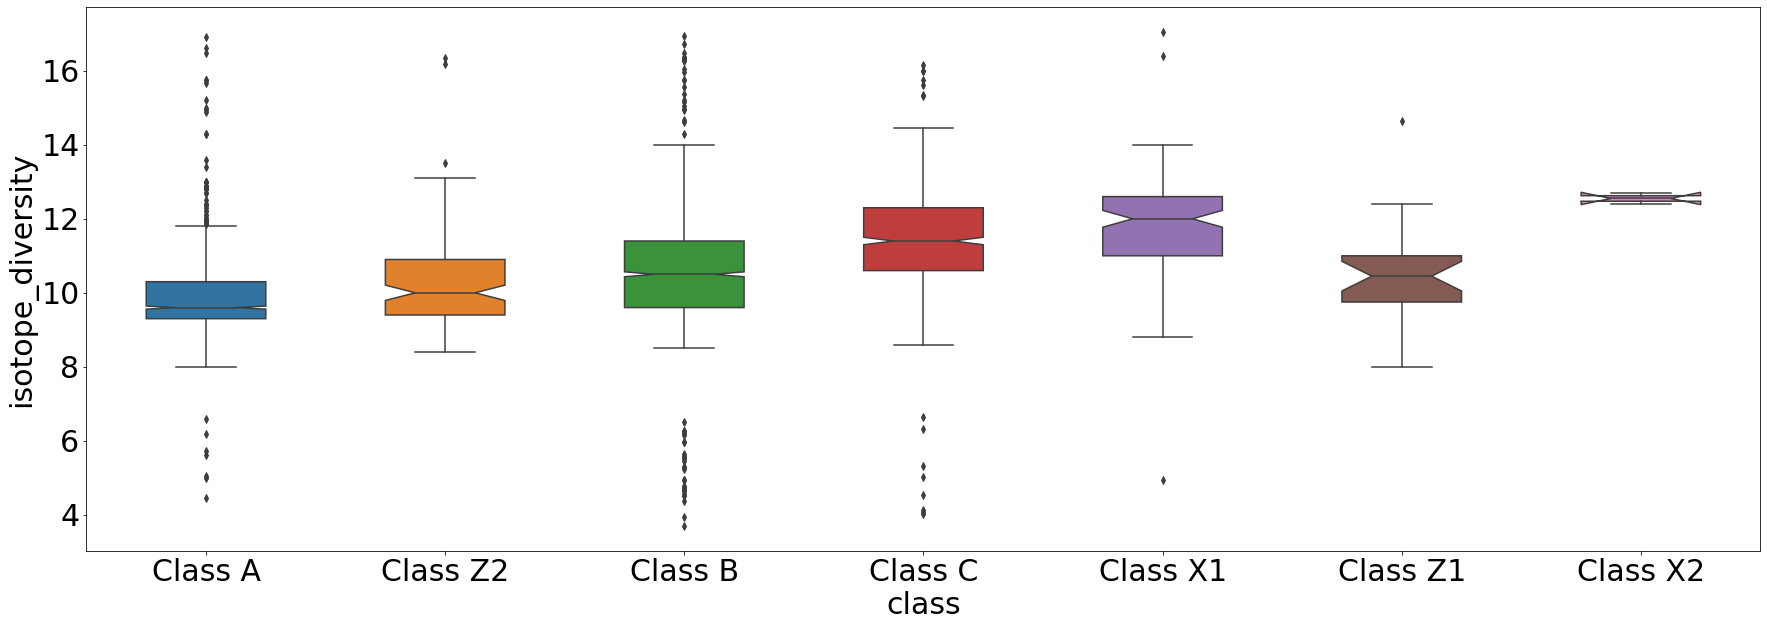

In [34]:
plt.figure(figsize = (30,10))
sns.boxplot( x=trainnull["class"], y=trainnull["isotope_diversity"], width = 0.5, notch = True)
plt.rcParams.update({'font.size': 30})

In [39]:
# visualizing defective status by payment_type
from matplotlib.pyplot import figure
figure(num=None, figsize=(12, 6))
y = trainnull.groupby(['class']).agg(np.size).values
x = trainnull.groupby(['class']).agg(np.size).index
sns.barplot(x=x, y=y, data=trainnull)

Exception: Data must be 1-dimensional

<Figure size 864x432 with 0 Axes>

In [40]:
trainnull.corr(method ='kendall') 

,sample_id,density,viscosity,conductance,pH,nitrates,phosphates,chlorides,sulphates,organics,metals,isotope_diversity
sample_id,1.000000,-0.194313,-0.202361,0.009572,-0.162001,-0.309742,0.092199,-0.334957,-0.254596,0.137348,0.265801,-0.005366
density,-0.194313,1.000000,0.315206,0.007472,-0.004049,0.179521,0.046917,0.418750,0.181821,0.353240,-0.005655,-0.492555
viscosity,-0.202361,0.315206,1.000000,-0.002799,-0.175215,0.139146,0.185282,0.259297,0.160741,-0.019491,-0.183847,-0.073921
conductance,0.009572,0.007472,-0.002799,1.000000,-0.012828,-0.004081,0.001258,-0.005401,0.010275,0.007448,-0.001189,-0.011482
pH,-0.162001,-0.004049,-0.175215,-0.012828,1.000000,0.113355,-0.194306,0.094996,0.162316,-0.152699,-0.100533,0.095691
nitrates,-0.309742,0.179521,0.139146,-0.004081,0.113355,1.000000,-0.194494,0.275755,0.179007,-0.047278,-0.250786,-0.011137
phosphates,0.092199,0.046917,0.185282,0.001258,-0.194306,-0.194494,1.000000,-0.044918,0.023979,0.066784,0.085577,0.004782
chlorides,-0.334957,0.418750,0.259297,-0.005401,0.094996,0.275755,-0.044918,1.000000,0.256033,-0.016981,-0.173011,-0.259549
sulphates,-0.254596,0.181821,0.160741,0.010275,0.162316,0.179007,0.023979,0.256033,1.000000,-0.097873,-0.153712,0.025635
organics,0.137348,0.353240,-0.019491,0.007448,-0.152699,-0.047278,0.066784,-0.016981,-0.097873,1.000000,0.251502,-0.202605


no correlation found

In [ ]:
from numpy import array
from sklearn.model_selection import KFold
# data sample
data = array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6])
# prepare cross validation
kfold = KFold(3, True, 1)
# enumerate splits
for train, test in kfold.split(data):
	print('train: %s, test: %s' % (data[train], data[test]))

In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
# create dataset
X, y = make_classification(n_samples=100, n_features=20, n_informative=15, n_redundant=5, random_state=1)

# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model = LogisticRegression()
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

In [ ]:
# 1. Remove categorial 
filltrain = traindata.select_dtypes(exclude=   
                 ["object"])
# 2. Fit the numerical data to Imputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(melbourne_data)
# 3.
X = imputer.transform(melbourne_data)
melbourne_data_tr = pd.DataFrame(X, columns=melbourne_data.columns, 
                    index=melbourne_data.index

In [46]:
traindata['class'] = traindata['class'].map({'Class A': 1, 'Class B': 2,'Class C': 3,'Class Z1': 4,'Class Z2': 5,'Class X1': 6,'Class X2': 7})
 

In [47]:
traindata.head()

,sample_id,class,density,viscosity,conductance,spectrum,pH,nitrates,phosphates,chlorides,sulphates,organics,metals,isotope_diversity
0,2998,1,0.99212,5.8,0.699926,violet,6.262996,0.36,0.50,0.127,0.45,1.0,4.143135,9.7
1,3411,5,0.99458,6.8,-0.781538,white,7.755652,0.27,0.29,0.046,0.48,4.6,1.791759,10.6
2,1371,2,0.99940,12.4,0.982642,red,5.889832,0.40,0.51,0.059,0.60,2.0,1.791759,9.3
3,925,1,0.99975,9.3,0.097245,red,7.133712,0.61,0.26,0.090,0.62,3.4,NaN,9.7
4,1859,2,0.98938,6.1,0.544021,ultraviolet,6.014220,0.34,0.29,0.036,0.44,2.2,3.218876,11.8


In [48]:
filltrain = traindata.select_dtypes(exclude=["object"])

In [49]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(filltrain)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [50]:
X = imputer.transform(filltrain)
finaltrain = pd.DataFrame(X, columns=filltrain.columns,index=filltrain.index)

In [51]:
finaltrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
sample_id            5000 non-null float64
class                5000 non-null float64
density              5000 non-null float64
viscosity            5000 non-null float64
conductance          5000 non-null float64
pH                   5000 non-null float64
nitrates             5000 non-null float64
phosphates           5000 non-null float64
chlorides            5000 non-null float64
sulphates            5000 non-null float64
organics             5000 non-null float64
metals               5000 non-null float64
isotope_diversity    5000 non-null float64
dtypes: float64(13)
memory usage: 507.9 KB


after droping sample number

In [53]:
finaltrain.head()

,sample_id,class,density,viscosity,conductance,pH,nitrates,phosphates,chlorides,sulphates,organics,metals,isotope_diversity
0,2998.0,1.0,0.99212,5.8,0.699926,6.262996,0.36,0.50,0.127,0.45,1.0,4.143135,9.7
1,3411.0,5.0,0.99458,6.8,-0.781538,7.755652,0.27,0.29,0.046,0.48,4.6,1.791759,10.6
2,1371.0,2.0,0.99940,12.4,0.982642,5.889832,0.40,0.51,0.059,0.60,2.0,1.791759,9.3
3,925.0,1.0,0.99975,9.3,0.097245,7.133712,0.61,0.26,0.090,0.62,3.4,3.367296,9.7
4,1859.0,2.0,0.98938,6.1,0.544021,6.014220,0.34,0.29,0.036,0.44,2.2,3.218876,11.8


In [57]:
finaldata=finaltrain.drop(["sample_id"],axis=1)

In [58]:
finaldata.groupby("class").agg("mean")

,density,viscosity,conductance,pH,nitrates,phosphates,chlorides,sulphates,organics,metals,isotope_diversity
class,,,,,,,,,,,
1.0,0.995833,7.318568,0.656681,6.942877,0.387524,0.305029,0.063908,0.525303,5.800449,3.184686,9.855390
2.0,0.994604,7.184028,0.632401,6.968609,0.312525,0.323112,0.053672,0.533181,5.564129,3.261561,10.560568
3.0,0.993236,7.124821,0.638141,7.091219,0.288559,0.338791,0.045659,0.552560,4.769649,3.276710,11.358614
4.0,0.995617,7.734615,0.718318,7.229395,0.531154,0.260769,0.064885,0.491154,3.431612,2.953070,10.384260
5.0,0.994783,7.199383,0.628913,7.051583,0.441204,0.267286,0.055025,0.502407,3.983212,2.686588,10.295802
6.0,0.992565,6.828169,0.658506,7.075954,0.285493,0.328094,0.041627,0.511268,5.397450,3.405506,11.698534
7.0,0.990075,7.000000,0.708704,7.724555,0.305000,0.370000,0.029500,0.490000,8.924786,3.487732,12.625000


In [60]:
X = finaldata.loc[:,finaldata.columns != 'class']
y = finaldata['class']

In [93]:
y.nunique()

7

In [61]:
# creating the train test split usually
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [62]:
X_train.columns

Index(['density', 'viscosity', 'conductance', 'pH', 'nitrates', 'phosphates',
       'chlorides', 'sulphates', 'organics', 'metals', 'isotope_diversity'],
      dtype='object')

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score

In [66]:
# Instantiate
model = RandomForestClassifier()

In [67]:
# Fit or train
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [68]:
# Predict the yvalue
y_pred = model.predict(X_test)

In [73]:
# Evaluate
print("The accuracy score of RandomForestClassifier model is %s" %(accuracy_score(y_test, y_pred)))
y_pred
#print("The fbeta score of RandomForestClassifier model is %s" %(fbeta_score(y_test, y_pred, beta = 1)))

The accuracy score of RandomForestClassifier model is 0.6333333333333333


array([3., 1., 1., ..., 2., 2., 3.])

In [71]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
# create dataset
#X, y = make_classification(n_samples=100, n_features=20, n_informative=15, n_redundant=5, random_state=1)
X1 = finaldata.loc[:,finaldata.columns != 'class']
y1 = finaldata['class']
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model = RandomForestClassifier()
# evaluate model
scores = cross_val_score(model, X1, y1, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.658 (0.010)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
#data_scaled = scaler.fit_transform(data)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("The accuracy score of RandomForestClassifier model is %s" %(accuracy_score(y_test, y_pred)))

In [74]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1497 entries, 0 to 1496
Data columns (total 13 columns):
sample_id            1497 non-null int64
density              1428 non-null float64
viscosity            1458 non-null float64
conductance          1497 non-null float64
spectrum             1497 non-null object
pH                   1497 non-null float64
nitrates             1461 non-null float64
phosphates           1497 non-null float64
chlorides            1468 non-null float64
sulphates            1449 non-null float64
organics             1497 non-null float64
metals               1462 non-null float64
isotope_diversity    1497 non-null float64
dtypes: float64(11), int64(1), object(1)
memory usage: 152.2+ KB


In [75]:
filltest = testdata.select_dtypes(exclude=["object"])
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(filltest)
X = imputer.transform(filltest)
finaltest = pd.DataFrame(X, columns=filltest.columns,index=filltest.index)
finaltest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1497 entries, 0 to 1496
Data columns (total 12 columns):
sample_id            1497 non-null float64
density              1497 non-null float64
viscosity            1497 non-null float64
conductance          1497 non-null float64
pH                   1497 non-null float64
nitrates             1497 non-null float64
phosphates           1497 non-null float64
chlorides            1497 non-null float64
sulphates            1497 non-null float64
organics             1497 non-null float64
metals               1497 non-null float64
isotope_diversity    1497 non-null float64
dtypes: float64(12)
memory usage: 140.5 KB


In [80]:
filltest.head()
finaltest.head()

,sample_id,density,viscosity,conductance,pH,nitrates,phosphates,chlorides,sulphates,organics,metals,isotope_diversity
0,6.0,0.99402,5.4,0.926185,9.808054,0.30,0.09,0.089,0.56,1.7,2.772589,11.6
1,9.0,0.99480,7.3,0.478675,8.191010,0.39,0.31,0.074,0.51,2.4,2.197225,9.4
2,11.0,0.99970,6.8,0.971762,8.501980,0.69,0.00,0.124,0.72,5.6,3.044522,10.2
3,12.0,0.99480,8.2,0.999759,8.066622,0.28,0.60,0.104,0.68,3.0,2.302585,10.6
4,13.0,0.99464,6.1,0.836948,7.880040,0.34,0.25,0.084,0.44,1.8,1.386294,10.1


In [77]:
finaltestdata=finaltest.drop(["sample_id"],axis=1)

In [78]:
finaltestdata.head()

,density,viscosity,conductance,pH,nitrates,phosphates,chlorides,sulphates,organics,metals,isotope_diversity
0,0.99402,5.4,0.926185,9.808054,0.30,0.09,0.089,0.56,1.7,2.772589,11.6
1,0.99480,7.3,0.478675,8.191010,0.39,0.31,0.074,0.51,2.4,2.197225,9.4
2,0.99970,6.8,0.971762,8.501980,0.69,0.00,0.124,0.72,5.6,3.044522,10.2
3,0.99480,8.2,0.999759,8.066622,0.28,0.60,0.104,0.68,3.0,2.302585,10.6
4,0.99464,6.1,0.836948,7.880040,0.34,0.25,0.084,0.44,1.8,1.386294,10.1


In [79]:
X2 = finaldata.loc[:,finaldata.columns != 'class']
y2 = finaldata['class']
model = RandomForestClassifier()
model.fit(X2,y2)
y_pred2 = model.predict(finaltestdata)
y_pred2

array([2., 1., 1., ..., 2., 2., 2.])

In [86]:
df_output=pd.DataFrame(y_pred2)
#df_output['sample_number']=finaltest["sample_id"]
#df_output=pd.concat([df_output,finaltestdata])
df_output[0] = df_output[0].map({1.0:'Class A', 2.0:'Class B',3.0:'Class C',4.0:'Class Z1',5.0:'Class Z2',6.0:'Class X1',7.0:'Class X2'})
 
df_output.to_csv('final_output.csv',index=False)

In [94]:
X3 = finaldata.loc[:,finaldata.columns != 'class']
y3 = finaldata['class']
y3.nunique()

7

In [96]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
X3_scaled = scaler.fit_transform(X3)
finaltestdata_scaled =scaler.transform(finaltestdata)
from sklearn.model_selection import StratifiedKFold

# prepare the cross-validation procedure
cv = StratifiedKFold(n_splits=2, random_state=1, shuffle=True)
# create model
model3 = RandomForestClassifier()
# evaluate model
scores = cross_val_score(model, X3_scaled, y3, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.613 (0.003)


In [99]:
X1 = finaldata.loc[:,finaldata.columns != 'class']
y1 = finaldata['class']
# prepare the cross-validation procedure
cv = KFold(n_splits=20, random_state=1, shuffle=True)
# create model
model4 = RandomForestClassifier()
# evaluate model
scores = cross_val_score(model, X1, y1, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.658 (0.020)


In [101]:
X5 = finaldata.loc[:,finaldata.columns != 'class']
y5 = finaldata['class']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
X5_scaled = scaler.fit_transform(X5)
finaltestdata_scaled =scaler.transform(finaltestdata)
# prepare the cross-validation procedure
cv = KFold(n_splits=20, random_state=1, shuffle=True)
# create model
model5 = RandomForestClassifier()
# evaluate model
scores = cross_val_score(model5, X5_scaled, y5, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.666 (0.019)


In [107]:
model5.fit(X5,y5)
y_pred3 = model5.predict(finaltestdata)
y_pred3

array([2., 1., 1., ..., 3., 2., 2.])

In [109]:
df_output2=pd.DataFrame(y_pred3)
#df_output['sample_number']=finaltest["sample_id"]
#df_output=pd.concat([df_output,finaltestdata])
df_output2[0] = df_output2[0].map({1.0:'Class A', 2.0:'Class B',3.0:'Class C',4.0:'Class Z1',5.0:'Class Z2',6.0:'Class X1',7.0:'Class X2'})
 
df_output2.to_csv('final_output2.csv',index=False)

In [102]:
from sklearn.linear_model import LogisticRegression
model8 = LogisticRegression()
model8.fit(X_train,y_train)
y_pred = model8.predict(X_test)
print("The accuracy score of RandomForestClassifier model is %s" %(accuracy_score(y_test, y_pred)))
y_pred

The accuracy score of RandomForestClassifier model is 0.516


/anaconda/envs/azureml_py36/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([2., 2., 1., ..., 2., 1., 2.])

In [103]:
from sklearn.naive_bayes import GaussianNB
model9 = GaussianNB()
model9.fit(X_train,y_train)
y_pred = model9.predict(X_test)
print("The accuracy score of RandomForestClassifier model is %s" %(accuracy_score(y_test, y_pred)))
y_pred

The accuracy score of RandomForestClassifier model is 0.464


array([3., 2., 1., ..., 2., 1., 3.])

In [106]:
from sklearn.svm import SVC
model10 = SVC()
model10.fit(X_train,y_train)
y_pred = model10.predict(X_test)
print("The accuracy score of RandomForestClassifier model is %s" %(accuracy_score(y_test, y_pred)))
y_pred

The accuracy score of RandomForestClassifier model is 0.5113333333333333


array([2., 1., 1., ..., 1., 2., 2.])

In [ ]:
X7 = finaldata.loc[:,finaldata.columns != 'class']
y7 = finaldata['class']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
X7_scaled = scaler.fit_transform(X7)
finaltestdata_scaled =scaler.transform(finaltestdata)
# prepare the cross-validation procedure
cv = KFold(n_splits=20, random_state=1, shuffle=True)
# create model
model7 = RandomForestClassifier()
# evaluate model
scores = cross_val_score(model7, X7_scaled, y7, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))